# CUSTOMER CHURN PREDICTION ANALYSIS

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Cleaning Old Model Files
Before training new models, let's remove any previously saved `.pkl` files from Google Drive to avoid confusion with outdated models.

In [2]:
import os

# Specify the directory
"""
directory = '/content/drive/MyDrive'

# List all files before deletion
print("Files in directory before deletion:")
print(os.listdir(directory))

# Loop through all files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        os.remove(file_path)  # Delete the file
        print(f'Deleted: {file_path}')
else:
    print("No files with .pkl extension are here to delete!")

# List all files after deletion
print("Files in directory after deletion:")
print(os.listdir(directory))
"""

'\ndirectory = \'/content/drive/MyDrive\'\n\n# List all files before deletion\nprint("Files in directory before deletion:")\nprint(os.listdir(directory))\n\n# Loop through all files in the specified directory\nfor filename in os.listdir(directory):\n    if filename.endswith(\'.pkl\'):\n        file_path = os.path.join(directory, filename)\n        os.remove(file_path)  # Delete the file\n        print(f\'Deleted: {file_path}\')\nelse:\n    print("No files with .pkl extension are here to delete!")\n\n# List all files after deletion\nprint("Files in directory after deletion:")\nprint(os.listdir(directory))\n'

In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, matplotlib, warnings
warnings.filterwarnings('ignore')

In [4]:
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(9, 5)
matplotlib.rcParams["figure.facecolor"]="#00000000"

In [5]:
%matplotlib inline
plt.show()

In [6]:
dataset_file_path="customer_churn_dataset.csv"
#dataset_file_path="/content/drive/MyDrive/customer_churn_dataset.csv"
df=pd.read_csv(dataset_file_path)
pd.set_option("display.max_columns", None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [8]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
len(df[df["TotalCharges"]==" "])

11

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.shape

(7043, 21)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
c=1
for i in df.columns:
  print(c, "--", i)
  c+=1

1 -- customerID
2 -- gender
3 -- SeniorCitizen
4 -- Partner
5 -- Dependents
6 -- tenure
7 -- PhoneService
8 -- MultipleLines
9 -- InternetService
10 -- OnlineSecurity
11 -- OnlineBackup
12 -- DeviceProtection
13 -- TechSupport
14 -- StreamingTV
15 -- StreamingMovies
16 -- Contract
17 -- PaperlessBilling
18 -- PaymentMethod
19 -- MonthlyCharges
20 -- TotalCharges
21 -- Churn


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


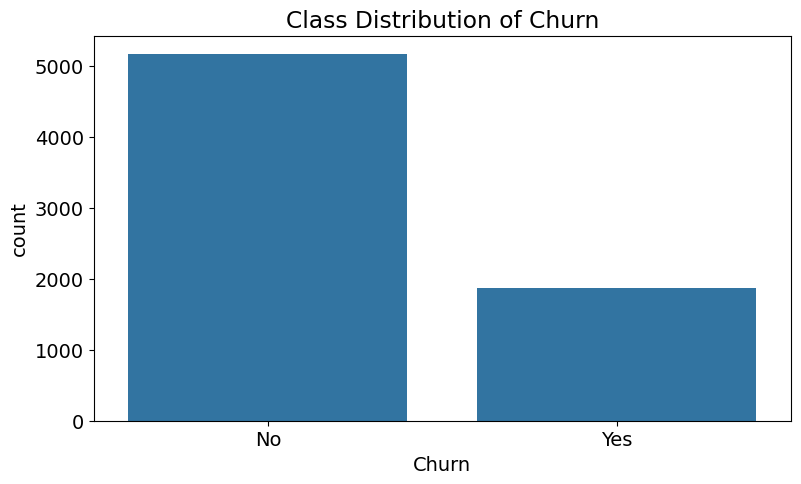

In [14]:
# Check class distribution
print(df['Churn'].value_counts(normalize=True) * 100)
# Shows percentage of No vs Yes

# Plot for visualization
sns.countplot(x='Churn', data=df)
plt.title('Class Distribution of Churn')
plt.show()

In [15]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


## Imbalanced Dataset
We see here that our dataset is highly imbalanced. So, we have to apply SMOTE technique here. But before that we have to ensure that there is no missing values in our dataset.

In [16]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# 1. CLEANING: Convert 'TotalCharges' to numeric and handle non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# 2. Identify all columns with a numerical data type (int or float)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("--- Checking Numerical Columns for Discrete/Categorical Features ---")
print("Heuristic: Flag numerical columns with fewer than 20 unique values.")

discrete_or_categorical_numerical_cols = []

for col in numerical_cols:
    n_unique = df[col].nunique()

    # Check if the number of unique values is low (e.g., less than 20)
    if n_unique <= 20:
        discrete_or_categorical_numerical_cols.append(col)
        print(f"\n[FLAGGED] Column '{col}':")
        print(f"  - Current dtype: {df[col].dtype}")
        print(f"  - Unique values count: {n_unique}")
        print(f"  - Unique values: {df[col].unique().tolist()}")
        print(f"  - Conclusion: Likely a discrete, ordinal, or binary categorical feature.")
    else:
        print(f"Column '{col}': {n_unique} unique values. Treated as continuous numerical.")

print("\n--- Summary of Numerical Columns with Categorical Features ---")
if discrete_or_categorical_numerical_cols:
    print(f"The numerical column(s) that are likely categorical/discrete are: {discrete_or_categorical_numerical_cols}")
else:
    print("No numerical columns were found that behave like categorical features based on the threshold.")

--- Checking Numerical Columns for Discrete/Categorical Features ---
Heuristic: Flag numerical columns with fewer than 20 unique values.

[FLAGGED] Column 'SeniorCitizen':
  - Current dtype: int64
  - Unique values count: 2
  - Unique values: [0, 1]
  - Conclusion: Likely a discrete, ordinal, or binary categorical feature.
Column 'tenure': 72 unique values. Treated as continuous numerical.
Column 'MonthlyCharges': 1584 unique values. Treated as continuous numerical.
Column 'TotalCharges': 6530 unique values. Treated as continuous numerical.

--- Summary of Numerical Columns with Categorical Features ---
The numerical column(s) that are likely categorical/discrete are: ['SeniorCitizen']


In [18]:
# 1. Clean the 'TotalCharges' column by converting it to numeric.
# Errors are coerced to NaN, which handles non-numeric strings (like spaces).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Drop rows with NaN in 'TotalCharges' (the rows that contained non-numeric data).
# This prepares the data for model training.
df.dropna(subset=['TotalCharges'], inplace=True)

# 3. Segregate columns into numerical and categorical lists

# Get numerical columns (including int64, float64 types)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Get categorical columns (object dtype, which includes strings)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Print the resulting lists
print("Numerical Columns List:")
print(numerical_cols)
print("\nCategorical Columns List:")
print(categorical_cols)

Numerical Columns List:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Columns List:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [20]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploring Unique Values in Categorical Columns

In [21]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
  if col not in features:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [22]:
df["TotalCharges"].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(7032,))

In [23]:
len(df[df["TotalCharges"]==" "])

0

In [24]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [25]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [26]:
df["TotalCharges"].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(7032,))

In [27]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Visualizing Churn Distribution

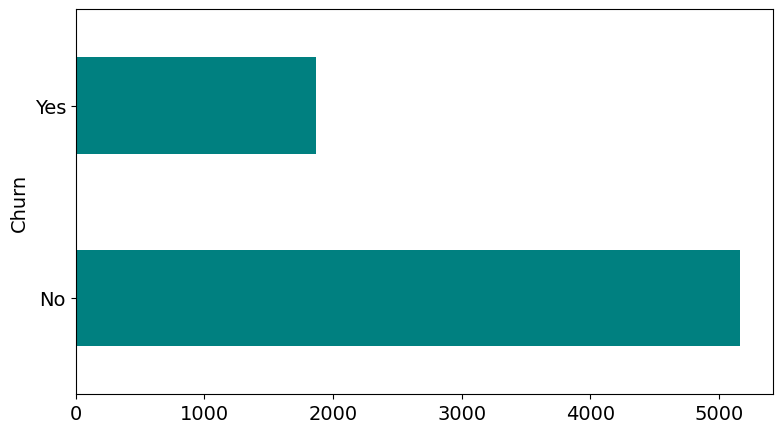

In [29]:
df["Churn"].value_counts().plot(kind='barh' , color = 'teal');

In [30]:
# --- SMOTE: Balance Training Data ---
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

## NOW the EDA(Exploratory Data Analysis) part...

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Kernel Density Estimation (KDE) Plots for Churn Analysis 📊

In [32]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {feature}")

    sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color='red', label='Churn: No', shade=True)
    sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color='blue', label='Churn: Yes', shade=True)

    plt.legend()  # legend

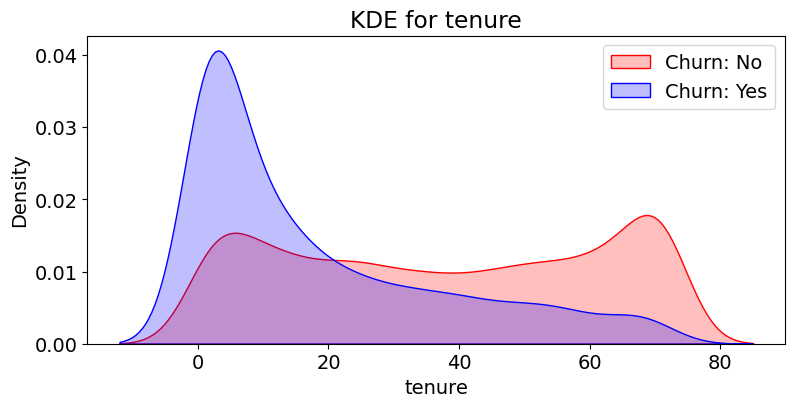

In [33]:
kdeplot('tenure')

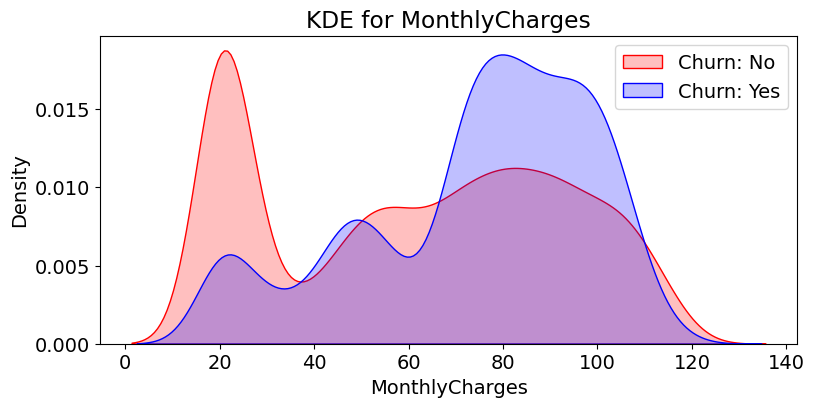

In [34]:
kdeplot('MonthlyCharges')

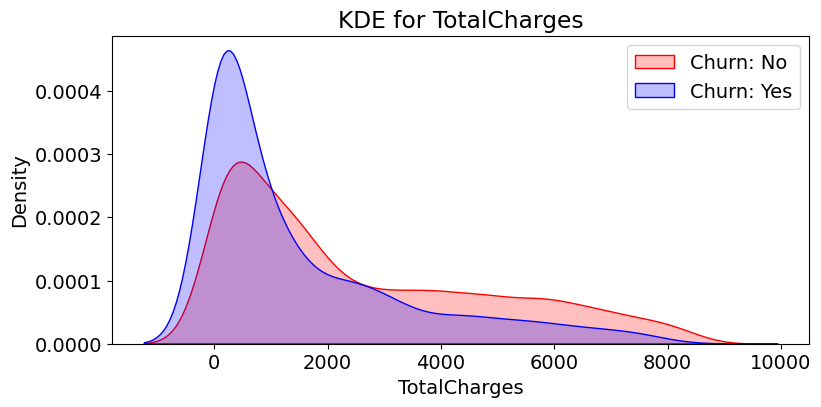

In [35]:
kdeplot('TotalCharges')

## Churn Distribution by Contract Type 📜📊

Text(0.5, 1.0, 'Churn by Contract Type')

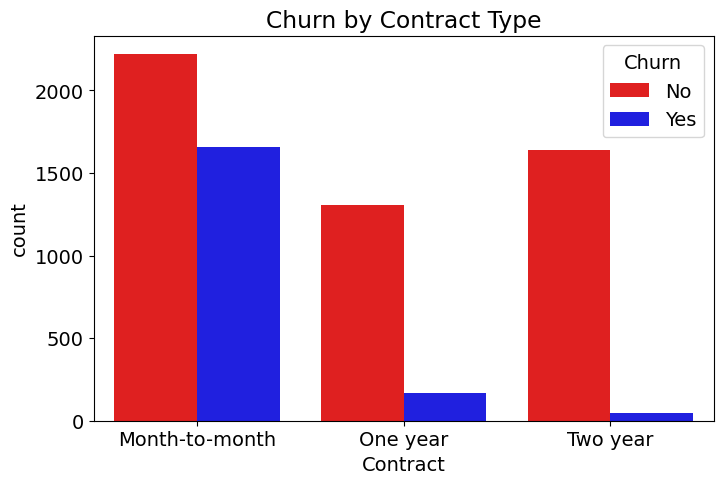

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette=['red', 'blue'])
plt.title('Churn by Contract Type')

## Monthly Charges Distribution by Churn 💰📊

Text(0.5, 1.0, 'Monthly Charges Distribution by Churn')

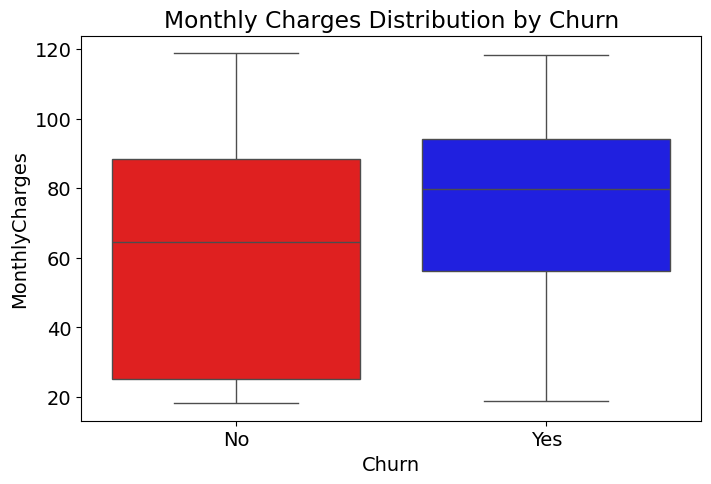

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['red', 'blue'])
plt.title('Monthly Charges Distribution by Churn')

## Churn Distribution by Internet Service Type 🌐📊

Text(0.5, 1.0, 'Churn by Internet Service Type')

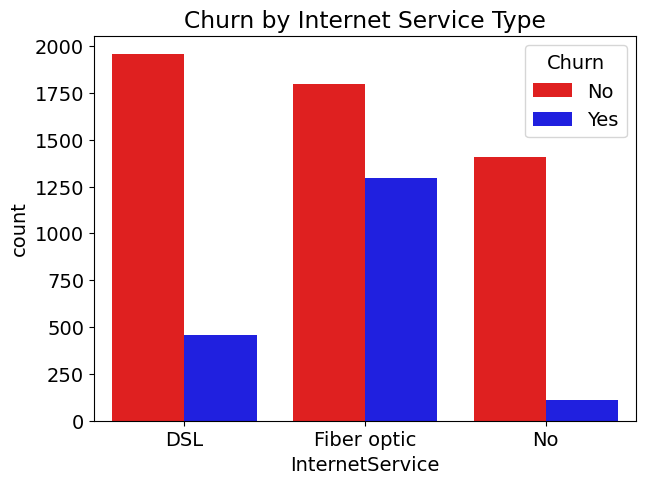

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette=['red', 'blue'])
plt.title('Churn by Internet Service Type')

## Churn Distribution by Payment Method 💳📊

Text(0.5, 1.0, 'Churn by Payment Method')

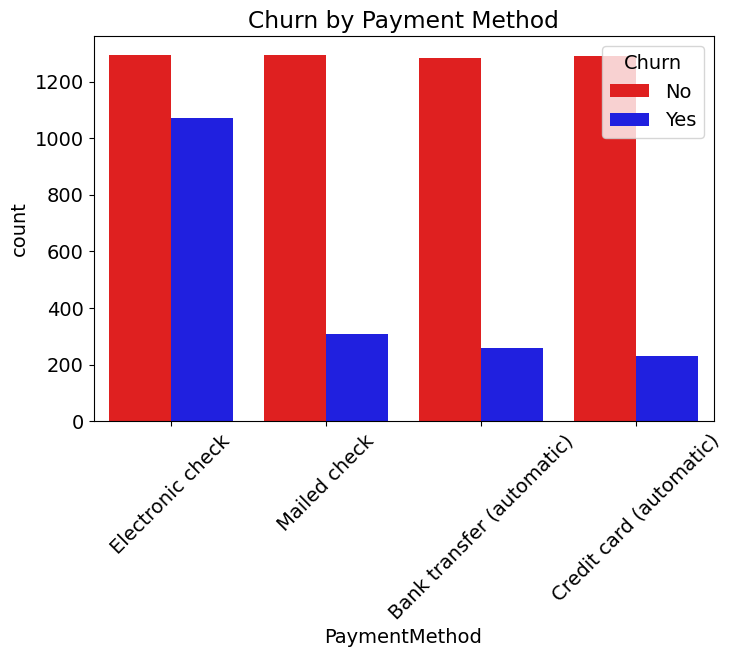

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')

## Correlation Heatmap of Numerical Features

Text(0.5, 1.0, 'Correlation Heatmap')

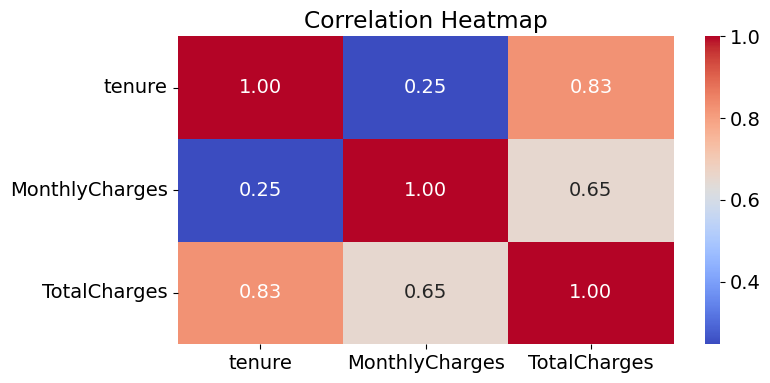

In [40]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

In [41]:
df.Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object

## Cleaning Categorical Columns for Consistency

In [42]:
def preprocess_churn_data(df, drop_ids=True):
    # Create a copy to avoid warnings
    df_copy = df.copy()

    # 1. ID Drop
    if drop_ids:
        df_copy = df_copy.drop(["customerID"], axis=1, errors="ignore")


    # --- 2. INCORPORATING USER'S SPECIFIC CLEANING & BINARY ENCODING ---

    # a) Specific Cleaning/Replacement for inconsistent 'No' values
    df_copy['MultipleLines'].replace('No phone service', 'No', inplace=True)

    service_cols_with_no_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in service_cols_with_no_internet:
        df_copy[col].replace('No internet service', 'No', inplace=True)

    # Manual Binary Encoding for 'gender'
    df_copy['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

    # b) Converting Yes/No Columns to Binary (0/1)
    yes_no_cols_to_encode = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                             'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

    # Map 'Yes'/'No' to 1/0 and convert to Integer type
    for col in yes_no_cols_to_encode:
        df_copy[col].replace({'Yes': 1, 'No': 0}, inplace=True)
        # Convert to a non-nullable integer type (int) for consistency with SMOTE
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce').astype(int)


    # --- 3. GENERIC IMPUTATION LOGIC ---

    # Numerical impute (using median)
    numerical_cols = df_copy.select_dtypes(include=np.number).columns
    df_copy[numerical_cols] = df_copy[numerical_cols].fillna(df_copy[numerical_cols].median())

    # Categorical impute (using mode)
    categorical_cols_before_ohe = df_copy.select_dtypes(include=object).columns
    for col in categorical_cols_before_ohe:
        if df_copy[col].isnull().any():
            df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

    # --- 4. FINAL CATEGORICAL ENCODING (One-Hot Encoding with dtype=int) ---

    # Use the explicit list and dtype=int as suggested by your friend.
    # Note: We do not use drop_first=True here, so we will add it to prevent multicollinearity.

    # The remaining 'object' columns are: ['InternetService', 'Contract', 'PaymentMethod']

    df_copy = pd.get_dummies(
        data=df_copy,
        columns=['InternetService', 'Contract', 'PaymentMethod'],
        drop_first=True,  # Crucial for preventing multicollinearity
        dtype=int         # CRITICAL CHANGE: Forces the new OHE columns to be integers (0/1)
    )

    # Ensure 'gender' and 'SeniorCitizen' are explicitly int type after all conversions
    df_copy['gender'] = df_copy['gender'].astype(int)
    df_copy['SeniorCitizen'] = df_copy['SeniorCitizen'].astype(int)

    # Explicitly convert any remaining pandas nullable Int64 types to standard int64
    for col in df_copy.columns:
        if str(df_copy[col].dtype) == 'Int64':
            df_copy[col] = df_copy[col].astype(int)

    # Return the processed DataFrame and the placeholder dictionary
    label_encoders = {}
    return df_copy, label_encoders

In [43]:
df_copy, _=preprocess_churn_data(df)
df_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


## Encoding Categorical Variables using One-Hot Encoding

In [44]:
df_copy["Contract_One year"]

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    0
Name: Contract_One year, Length: 7032, dtype: int64

In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Streaming

In [46]:
df_copy.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year   

## Scaling Numerical Features using MinMaxScaler

In [47]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_copy[cols_to_scale] = scaler.fit_transform(df_copy[cols_to_scale])

# Checking Vlaues now
for col in df_copy:
    print(f'{col}: {df_copy[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Splitting Features and Target Variable

In [48]:
# splitting the features and target
X = df_copy.drop(columns=["Churn"])
y = df_copy["Churn"]

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())

Churn
0    4130
1    1495
Name: count, dtype: int64


## Handling Imbalanced Data using SMOTE ⚖️

In [49]:
#  Synthetic Minority Over-sampling Technique

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.value_counts())

Churn
1    4130
0    4130
Name: count, dtype: int64


## Machine Learning Model Evaluations and Predictions

### Training and Evaluating Support Vector Machine (SVM) Model

In [50]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train_smote, y_train_smote)

accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc*100)

SVM accuracy is: 74.4136460554371


### Training and Evaluating Random Forest Model

In [51]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_smote, y_train_smote)

accuracy_rf = model_rf.score(X_test, y_test)
print("Random Forest accuracy is:", accuracy_rf*100)

Random Forest accuracy is: 76.04832977967307


## Visualizing Feature Importance from Random Forest

Text(0, 0.5, 'Feature')

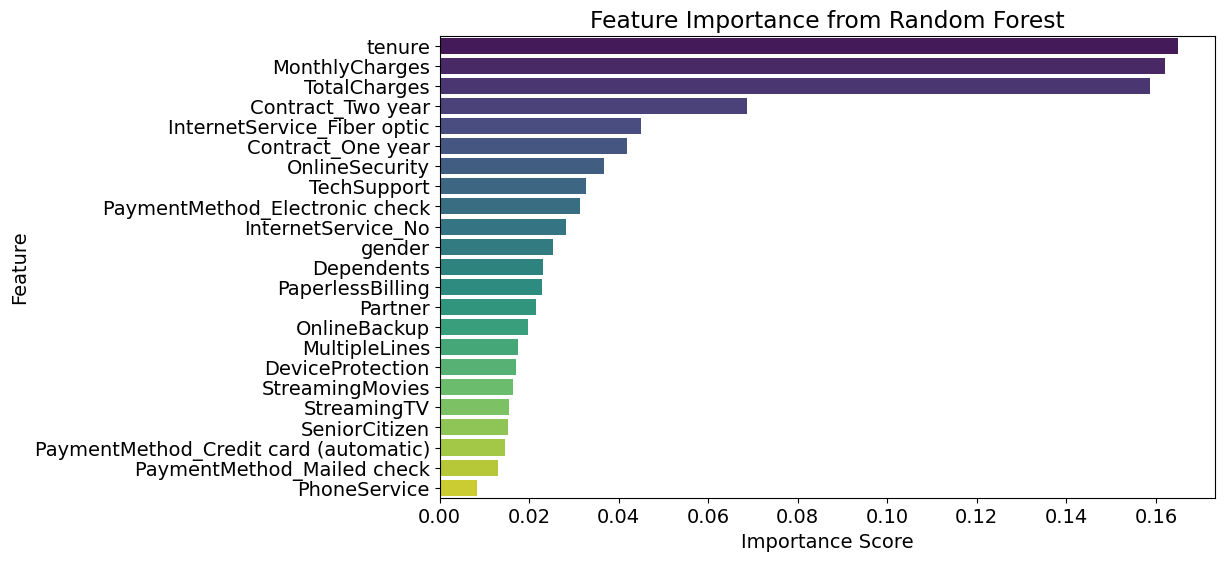

In [52]:
# Get feature importance scores
feature_importance = model_rf.feature_importances_  # Attribute

feat_importance_df = pd.DataFrame({'Feature': X_train_smote.columns, 'Importance': feature_importance})

# Sort by importance
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance_df['Importance'], y=feat_importance_df['Feature'], palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

## Saving the Random Forest Model using Pickle

In [53]:
pickle.dump(model_rf, open("model/random_forest_model.pkl", "wb"))

In [54]:
#from google.colab import files

# --- 1. Save the model (Assuming this is already done) ---
# Replace 'model_rf' with the variable name of your trained model
# with open("random_forest_model.pkl", "wb") as file:
#     pickle.dump(model_rf, file)

# --- 2. Download the saved file ---
# Specify the name of the file you want to download
#model_filename = "random_forest_model.pkl"

#print(f"Starting download of {model_filename}...")
#files.download(model_filename)
#print("Download complete. Check your local machine's download folder.")